# PREDICTION USING DECISION TREE ALGORITHM
## TO CREATE THE DECISION TREE CLASSIFIER AND VISUALIZE IT.
## PURPOSE : IF WE FEED ANY NEW DATA TO THE CLASSIFIER, IT WOULD BE TO ABLE TO PREDICT THE RIGHT CLASS ACCORDINGLY

## STEPS INVOLVED:
### 1. IMPORTING LIBRARIES AND DATA TO BE USED
### 2. EXPLORATORY DATA ANALYSIS
### 3. VISUALIZING DATA
### 4. MODEL TRAINING & FITTING
### 5. VISUALIZING TRAINED MODDEL
### 6. PREDICTION AND EVALUATION

## Step 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [29]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import pydot # data visualization library
from IPython.display import Image # data visualization library
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

# for model training 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

In [30]:
# importing data
df = pd.read_csv('Task-3 Iris.csv')# task_3 data importing

In [31]:
df = df.drop('Id',axis=1)

In [32]:
df.head(10) # fetching first 10 rows of the data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Step 2 : EXPLORATORY DATA ANALYSIS

In [33]:
# shape of data
df.shape

(150, 5)

In [34]:
# statistical description of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
# checking missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [37]:
# checking the categories in Species column
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

## Step 3 : VISUALIZING DATA 

In [38]:
# ENCODING THE SPECIES USING LABEL ENCODER FROM SKLEARN LIBRARY
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

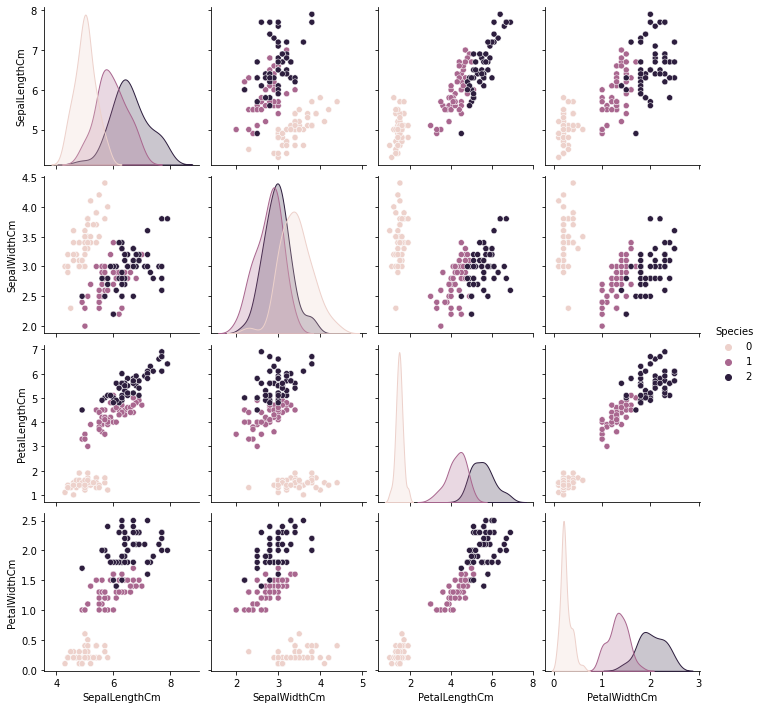

In [39]:
# plotting Pairplot graph
sns.pairplot(df,hue='Species')
plt.show()

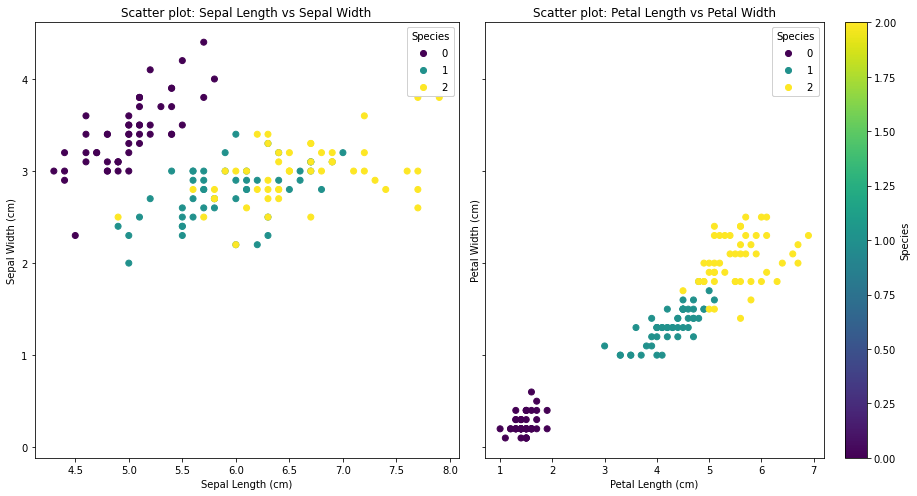

In [40]:
# Scatter plot of data based on Sepal Length and Width features
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(13, 7))

# Plot the first scatter plot with hue
scatter1 = axes[0].scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'], cmap='viridis')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')
axes[0].set_title('Scatter plot: Sepal Length vs Sepal Width')

# Plot the second scatter plot with hue
scatter2 = axes[1].scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['Species'], cmap='viridis')
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
axes[1].set_title('Scatter plot: Petal Length vs Petal Width')

# Add a colorbar for the hue
cbar = plt.colorbar(scatter2)
cbar.set_label('Species')

# Add legends for the species
legend1 = axes[0].legend(*scatter1.legend_elements(), title='Species')
axes[0].add_artist(legend1)
legend2 = axes[1].legend(*scatter2.legend_elements(), title='Species')
axes[1].add_artist(legend2)

# Adjust spacing between subplots
plt.tight_layout()

# Show the scatter plots
plt.show()

### 0 : Setosa, 1 : Versicolor , 2 : Virginica

## Step 4 : MODEL TRAINING & FITTING 

In [41]:
# splitting the data into feature and target variables
X = df.drop('Species',axis=1)
y = df['Species']

In [42]:
# model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102) 
tree_classifier = DecisionTreeClassifier()

In [43]:
# fitting the model
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)

Training Complete.


In [44]:
print("X train.shape =", X_train.shape)
print("y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("y test.shape  =", y_test.shape)

X train.shape = (105, 4)
y train.shape = (105,)
X test.shape  = (45, 4)
y test.shape  = (45,)


## Step 5 : VISUALIZING TRAINED MODDEL

### Comparing the Actual with Predicted ones.

In [45]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df_compare 

,Actual,Predicted
8,0,0
103,2,2
65,1,1
82,1,1
117,2,2
34,0,0
11,0,0
10,0,0
98,1,1
86,1,1


In [46]:
features = list(df.columns[:-1])
features
class_name = list(df.columns[-1])

In [47]:
from sklearn import tree

[Text(372.0, 815.4, 'petal length (cm) <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [33, 38, 34]\nclass = versicolor'),
 Text(186.0, 634.2, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = setosa'),
 Text(558.0, 634.2, 'petal width (cm) <= 1.75\ngini = 0.498\nsamples = 72\nvalue = [0, 38, 34]\nclass = versicolor'),
 Text(372.0, 453.0, 'petal length (cm) <= 5.05\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]\nclass = versicolor'),
 Text(186.0, 271.80000000000007, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(558.0, 271.80000000000007, 'sepal length (cm) <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(372.0, 90.60000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(744.0, 90.60000000000002, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(744.0, 453.0, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]\nclass = virginica')]

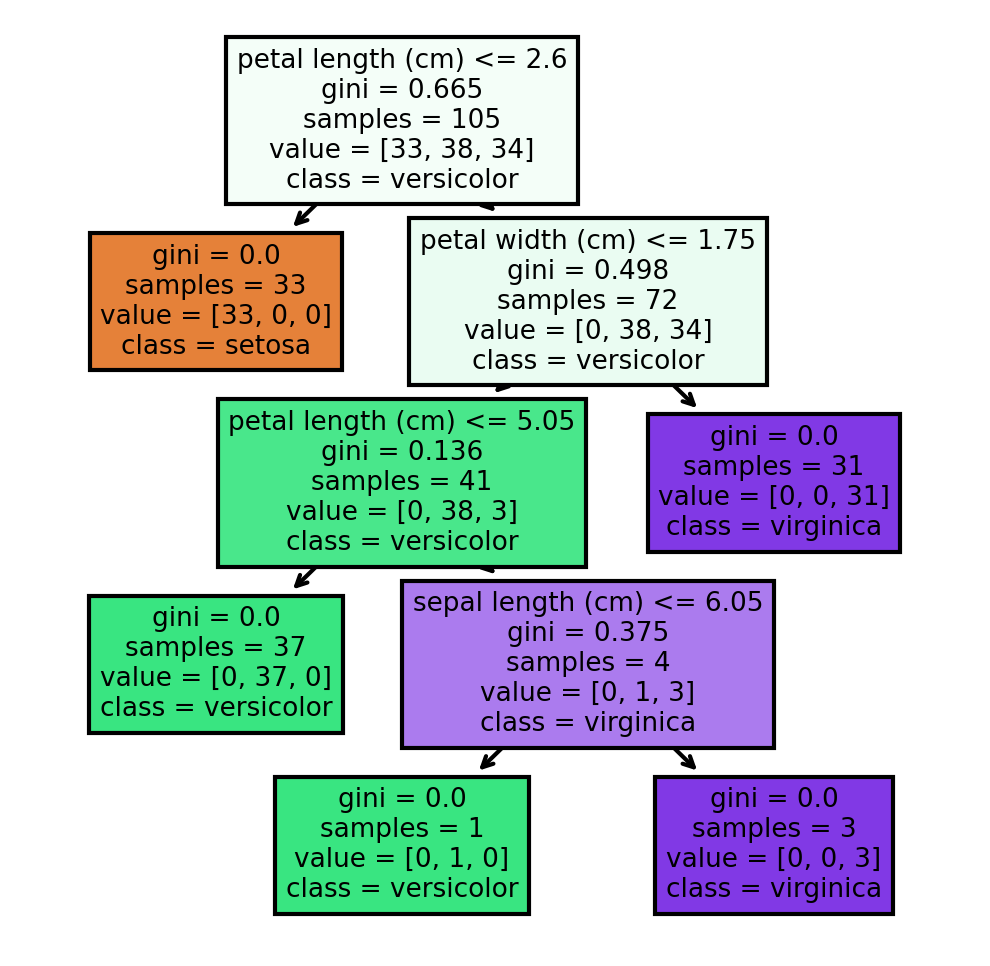

In [48]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(tree_classifier, feature_names = fn, class_names = cn, filled = True)

## Step 6 : PREDICTION AND EVALUATION

### Predicting the Error

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = metrics.mean_squared_error(y_test,y_pred) # Mean Squared Error
root_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred)) # Root Mean Squared Error
Abs_E = np.sqrt(metrics.mean_absolute_error(y_test,y_pred)) # Root mean Absolute Error
print("Mean Squared Error=",MSE)
print("Root Mean Squared Error=",root_E)
print("Mean Absolute Error=",Abs_E)

Mean Squared Error= 0.06666666666666667
Root Mean Squared Error= 0.2581988897471611
Mean Absolute Error= 0.2581988897471611


In [50]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      0.92      0.88        12
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [51]:
# checking Goodness of fit Test
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9090296495956873

## 90% R2 Score indicates that above fitted Model is a GOOD MODEL and the accuray of the model is 93% which is quite good.

### Predicting the Model

In [59]:
Sepal_Length = str(input("Enter Sepal Length: "))
Sepal_Width = str(input("Enter Sepal Width: "))
Petal_Length = str(input("Enter Petal Length: "))
Petal_Width = str(input("Enter Petal Length: "))
Output = tree_classifier.predict([[Sepal_Length,Sepal_Width,Petal_Length,Petal_Width]])
if Output == 0:
    print('Setosa')
elif Output == 1:
    print('Versicolor')
elif Output == 2:
    print('Virginica')
else:
    print('Invalid Input')

Enter Sepal Length: 5.1
Enter Sepal Width: 2.5
Enter Petal Length: 3.0
Enter Petal Length: 1.1
Versicolor
